## Importing the libraries 

In [385]:
#importing the required libraries and packages  
import numpy as np
import pandas as pd

#importing libraries for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

#inbuilt module calendar that handles operations related to the calendar
import calendar

#importing Scikit learn library for train test split
import sklearn
from sklearn.model_selection import train_test_split

#for scaling the fatures
from sklearn.preprocessing import MinMaxScaler

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm  

#for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Reading the dataset from day.csv file and understanding it

In [322]:
#Reading the csv file 
Bike_Sharing = pd.read_csv('day.csv')

In [323]:
#Cheking the data present in the day.csv
Bike_Sharing.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [324]:
#Shape of the dataset
Bike_Sharing.shape

(730, 16)

In [325]:
#Getting the more detailed information on the dataset
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [326]:
#Check the dataset for missing values
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [327]:
#Check the total size of the dataset
Bike_Sharing.size

11680

In [328]:
#List all the column names present in the dataset
Bike_Sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### From the obove operations, following things are observed 
###### Total number of Rows = 730
###### Total number of columns = 16
###### Total size of the dataset is 11680 and all are non-zero values 
###### Since there isn't much difference between mean(365.500000) and median(365.500000), both are actually same which shows that there are no outliers

## Cleaning of the data

#### From the careful obervation of the data, we can conclude that
#### The dteday can be removed becasue we have similar data in the form of year and month
#### Instant column is just similar to row number, which can be dropped

In [329]:
#Dropping the columns which are not required 
Bike_Sharing.drop(['instant','dteday'], axis=1, inplace=True)

In [330]:
# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
Bike_Sharing.drop(['casual','registered'], axis = 1, inplace = True)

In [331]:
Bike_Sharing.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [332]:
#Converting the numeric values in month to categorical data
#Bike_Sharing['mnth'] = Bike_Sharing['mnth'].apply(lambda x: calendar.month_abbr[x])

In [333]:
Bike_Sharing.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [334]:
#Converting the numeric values in season to categorical data
Bike_Sharing.season = Bike_Sharing.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [335]:
Bike_Sharing.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [336]:
#Converting the numeric values present in weekday to a categorical data
Bike_Sharing.weekday = Bike_Sharing.weekday.map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'})

In [337]:
Bike_Sharing.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [338]:
## mapping weathersit
Bike_Sharing.weathersit = Bike_Sharing.weathersit.map({1:'Good&Clear',2:'Moderate&Cloudy', 
                                             3:'Bad&Rain',4:'Thunder&severe'})

In [339]:
Bike_Sharing.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,Moderate&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,Moderate&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,Good&Clear,8.050924,9.47025,43.7273,16.636703,1349


## Visualization of Data with the help of maps

### Visualising Numeric Variables

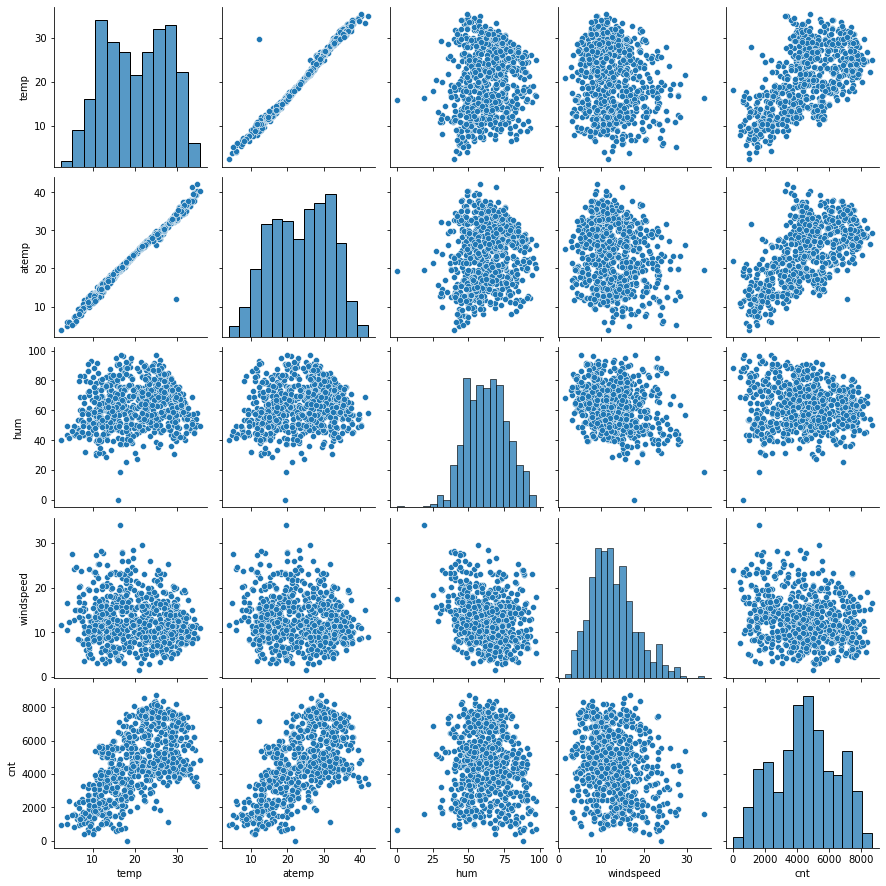

In [340]:
sns.pairplot(data=Bike_Sharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

##### temp and atemp are highly correlated with each other

### Visualization of categorical variable

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

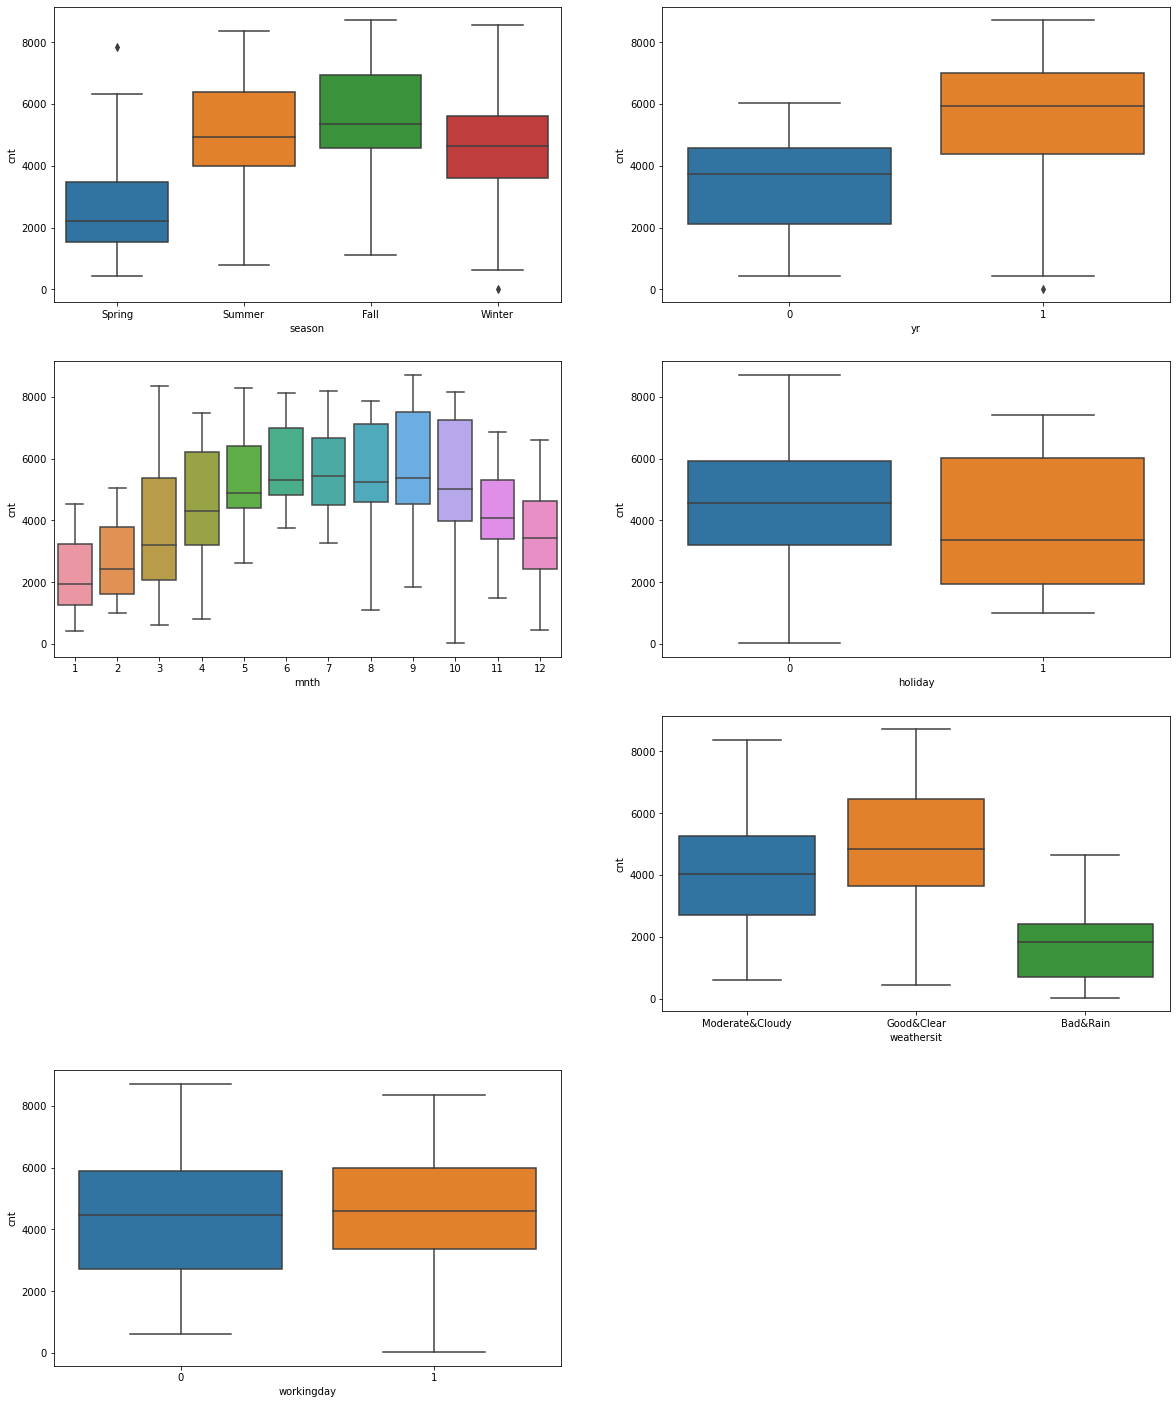

In [341]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing)

plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_Sharing)

plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing)

plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Sharing)

#plt.subplot(4,2,5)
#min([], default="EMPTY")
#sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing)

plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing)

plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing)

#### Plot1: SeasonVsCount - The count is least during spring 
#### Plot2: YearVsCount - The count has increased in the next year(2019)
#### Plot3: MonthVsCount - The count has decrase in the first 2 and last 2 months of the year 
#### Plot4: HolidayVsCount - We can say that the count is more on a nonholiday day
#### Plot5: WeekdayVsCount - Can't say much on this trend, but we can say that count is relatively more on Wed and Sat
#### Plot6: WheatherVsCount - The count is more during condition '1'
#### Plot7: WorkingdayVsCount - not giving much clear picture

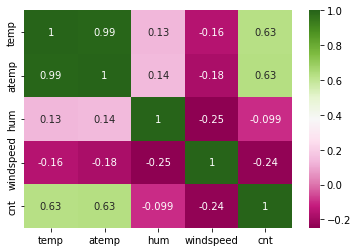

In [342]:
# Checking continuous variables relationship with each other
sns.heatmap(Bike_Sharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='PiYG', annot = True)
plt.show()

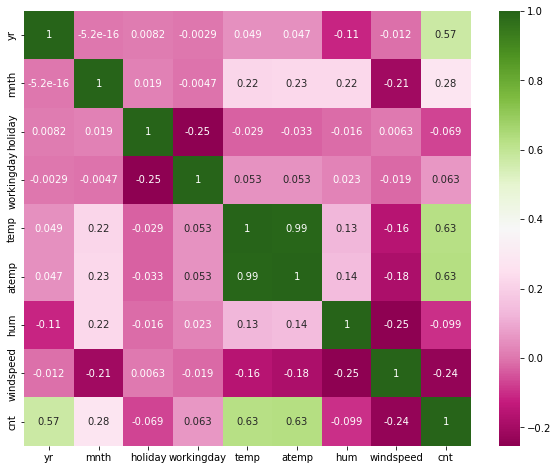

In [343]:
#Correlations for numeric variables
cor=Bike_Sharing.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap="PiYG", annot = True)
plt.show()

## Creating Dummy varaibles

In [344]:
#creating dummy variables for categorical variables 
Bike_Sharing = pd.get_dummies(data=Bike_Sharing,columns=['season', 'mnth', 'weekday','weathersit'],drop_first=True)

In [345]:
Bike_Sharing.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good&Clear,weathersit_Moderate&Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0


In [346]:
Bike_Sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Good&Clear',
       'weathersit_Moderate&Cloudy'],
      dtype='object')

## Splitting the Data

In [347]:
#y to contain only target variable
y=Bike_Sharing.pop('cnt')
#X is all remainign variable also our independent variables
X=Bike_Sharing

In [348]:
#Splitting the Data using train split in 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [349]:
X.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good&Clear,weathersit_Moderate&Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [350]:
X_train.shape

(511, 29)

In [351]:
X_test.shape

(219, 29)

## For continous variables - Feature Scaling

In [352]:
#scaler function
scaler = MinMaxScaler()

In [353]:
# Applying the above scaler function to the columns 
num_vars = ['hum','windspeed','temp','atemp']


In [354]:
#fit transform
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [355]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_Spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good&Clear,weathersit_Moderate&Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,0.243137,...,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,0.429398,...,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [356]:
train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_Spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good&Clear,weathersit_Moderate&Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,922,6612,0,...,1,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,968,6248,0,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,956,3110,1,...,0,0,0,0,0,0,0,1,0,1


## Building a linear model

In [357]:
# Building a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [358]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [359]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 7),
 ('mnth_5', False, 3),
 ('mnth_6', False, 15),
 ('mnth_7', True, 1),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Good&Clear', True, 1),
 ('weathersit_Moderate&Cloudy', True, 1)]

## Manual elimination

In [360]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [361]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_7', 'mnth_9',
       'mnth_10', 'weekday_Saturday', 'weathersit_Good&Clear',
       'weathersit_Moderate&Cloudy'],
      dtype='object')

In [362]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [363]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [364]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()
# Check the parameters obtained
lm.params

const                           30.920590
yr                            2005.363305
holiday                       -492.782131
workingday                     387.816888
temp                          4443.868319
hum                          -1425.189831
windspeed                    -1593.434511
season_Spring                 -538.441105
season_Summer                  453.523928
season_Winter                  720.827642
mnth_7                        -451.709761
mnth_9                         746.885984
mnth_10                        338.782225
weekday_Saturday               470.647421
weathersit_Good&Clear         2187.522075
weathersit_Moderate&Cloudy    1691.026977
dtype: float64

In [365]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.43e-192
Time:                        16:40:50   Log-Likelihood:                -4114.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [366]:
## dropping weekday_Saturday since it has p > 0.05
X_train_new = X_train_rfe.drop(["const"], axis = 1)

## Next iteration for Model

In [367]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()
#Summary of the model
lm.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.43e-192
Time:                        16:40:51   Log-Likelihood:                -4114.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         30.9206    419.058      0.074      0.941    -792.431     854.272
yr                          2005.3633     69.481     28.862      0.000    1868.850    2141.877
holiday                     -492.7821    233.839     -2.107      0.036    -952.221     -33.343
workingday                   387.8169    100.176      3.871      0.000     190.994     584.640
temp                        4443.8683    295.495     15.039      0.000    3863.289    5024.447
hum                        -1425.1898    323.743     -4.402      0.000   -2061.270    -789.109
windspeed                  -1593.4345    220.415     -7.229      0.000   -2026.498   -1160.371
season_Spring               -538.4411    180.283     -2.987      0.003    -892.655    -184.227
season_Summer                453.5239    128.401      3.532      0.000     201.246     705.801
season_Winter                720.8276    162.589      4.433      0.000     401.377    1040.278
mnth_7                      -451.7098    157.152     -2.874      0.004    -760.477    -142.943
mnth_9                       746.8860    143.935      5.189      0.000     464.087    1029.685
mnth_10                      338.7822    150.289      2.254      0.025      43.498     634.066
weekday_Saturday             470.6474    126.058      3.734      0.000     222.973     718.322
weathersit_Good&Clear       2187.5221    227.250      9.626      0.000    1741.028    2634.016
weathersit_Moderate&Cloudy  1691.0270    215.115      7.861      0.000    1268.376    2113.678
==============================================================================
Omnibus:                       76.064   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.100
Skew:                          -0.742   Prob(JB):                     3.54e-44
Kurtosis:                       5.682   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.04
3,temp,22.54
13,weathersit_Good&Clear,15.10
14,weathersit_Moderate&Cloudy,9.18
6,season_Spring,5.63
2,workingday,5.45
8,season_Winter,4.94
5,windspeed,4.67
7,season_Summer,3.20
0,yr,2.10


In [369]:
### dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

## Next iteration for Model

In [370]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [371]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit() 

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.71e-189
Time:                        16:40:57   Log-Likelihood:                -4124.0
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [372]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_Good&Clear,15.08
3,temp,14.41
13,weathersit_Moderate&Cloudy,8.49
2,workingday,5.36
4,windspeed,4.64
5,season_Spring,4.24
7,season_Winter,3.60
6,season_Summer,2.79
0,yr,2.08
11,weekday_Saturday,1.99


In [373]:
### dropping hum from the model
#X_weather = X_train_new.pop('weathersit_Good&Clear')

## Next iteration for Model

In [311]:
# Adding a constant variable 
#X_train_lm = sm.add_constant(X_train_new)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [254]:
# Create a first fitted model
#lm = sm.OLS(y_train,X_train_lm).fit() 

# Check the summary
#print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.40e-163
Time:                        16:20:25   Log-Likelihood:                -4188.8
No. Observations:                 511   AIC:                             8406.
Df Residuals:                     497   BIC:                             8465.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### R value is getting reduced, so we will not use this model, will keep the weathersit_Good&Clear  feature


In [374]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_7', 'mnth_9', 'mnth_10',
       'weekday_Saturday', 'weathersit_Good&Clear',
       'weathersit_Moderate&Cloudy'],
      dtype='object')

## Residual Analysis of the train data

In [375]:
y_train_cnt = lm.predict(X_train_lm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

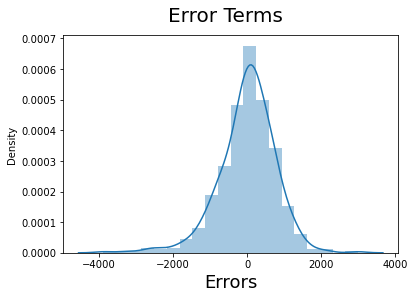

In [376]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)  
# for X labels
plt.xlabel('Errors', fontsize = 18)                         

## Predictions Using the Final Model

In [378]:
#Applying the scaling on the test sets

num_vars = ['hum','windspeed','temp','atemp']
test[num_vars] = scaler.transform(test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [379]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Good&Clear,weathersit_Moderate&Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,875.968037,3671.013699,4546.981735,...,0.082192,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,712.783588,1509.322560,1898.633630,...,0.275286,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000,441.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,336.500000,2507.500000,3303.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,736.000000,3667.000000,4579.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1190.000000,4624.000000,5869.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000,8395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [380]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [381]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
#information 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   holiday                     219 non-null    int64  
 3   workingday                  219 non-null    int64  
 4   temp                        219 non-null    float64
 5   windspeed                   219 non-null    float64
 6   season_Spring               219 non-null    uint8  
 7   season_Summer               219 non-null    uint8  
 8   season_Winter               219 non-null    uint8  
 9   mnth_7                      219 non-null    uint8  
 10  mnth_9                      219 non-null    uint8  
 11  mnth_10                     219 non-null    uint8  
 12  weekday_Saturday            219 non-null    uint8  
 13  weathersit_Good&Clear       219 no

In [382]:
# Making predictions using best fit model
y_pred = lm.predict(X_test)

In [383]:
#Rsquare 
r2_score(y_test, y_pred)

-1554.9262671526417

In [386]:
mse = mean_squared_error(y_test, y_pred)
mse

5583206997.1433115

Text(0, 0.5, 'y_pred')

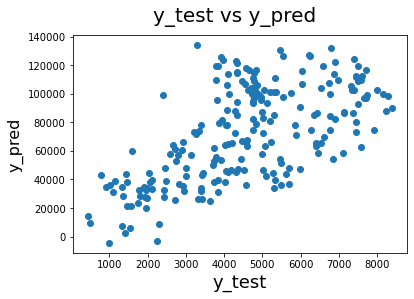

In [387]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)  

In [394]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
4,temp,4131.206012
13,weathersit_Good&Clear,2578.838768
1,yr,2040.418454
14,weathersit_Moderate&Cloudy,1854.052834
10,mnth_9,691.648464
8,season_Winter,599.147962
12,weekday_Saturday,513.117225
3,workingday,414.868815
7,season_Summer,400.674646


##### All the positive coefficients like temp,weathersit_Good&Clear, yrindicate that an increase in these values will lead to an increase in the value of cnt
##### All the negative coefficients such as windspeed, holiday indicate that an increase in these values will lead to an decrease in the value of cnt.
##### 
##### Temp is the most significant with the largest coefficient.
#####  9th Month has got good impact on number of rides
##### 7th Month has got negative impact since most probably would be mansoon in India, so people prefer 4 wheelers rather 2 wheeler
##### holidays as usaul has got negative impact on number of rides